In [1]:
#import libs
import pandas as pd
from sklearn import metrics
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy as sc
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Read a data

In [2]:
#importing prepared data - daily cohorts with counts and ACQ_BEDVALUE Mean by stay value - I decided to transform this task to Cohort LTV prediction
initial_dataframe=pd.read_csv('cohorts_7.csv')

In [3]:
initial_dataframe.drop(['Unnamed: 0','ACQ_BOOKEDDATE'],axis=1,inplace=True)

In [4]:
initial_dataframe

,ACQ_BEDVALUE_Mean,Customers_count,LIFETIME_BEDVALUE_mean,ACQ_BEDVALUE/Domestic/DESKTOP/1-2 Nights/,ACQ_BEDVALUE/Domestic/DESKTOP/3-4 Nights/,ACQ_BEDVALUE/Domestic/DESKTOP/5-6 Nights/,ACQ_BEDVALUE/Domestic/DESKTOP/7+ Nights/,ACQ_BEDVALUE/Domestic/MOBILE/1-2 Nights/,ACQ_BEDVALUE/Domestic/MOBILE/3-4 Nights/,ACQ_BEDVALUE/Domestic/MOBILE/5-6 Nights/,...,CUSTOMER_ID/Long Haul/MOBILE/5-6 Nights/,CUSTOMER_ID/Long Haul/MOBILE/7+ Nights/,CUSTOMER_ID/Short Haul/DESKTOP/1-2 Nights/,CUSTOMER_ID/Short Haul/DESKTOP/3-4 Nights/,CUSTOMER_ID/Short Haul/DESKTOP/5-6 Nights/,CUSTOMER_ID/Short Haul/DESKTOP/7+ Nights/,CUSTOMER_ID/Short Haul/MOBILE/1-2 Nights/,CUSTOMER_ID/Short Haul/MOBILE/3-4 Nights/,CUSTOMER_ID/Short Haul/MOBILE/5-6 Nights/,CUSTOMER_ID/Short Haul/MOBILE/7+ Nights/
0,569.1836,1228,10452.7843,0.4922,1.4406,1.9236,2.1848,0.4969,0.9032,1.4853,...,0.0024,0.0049,0.1474,0.0774,0.0147,0.0098,0.0920,0.0358,0.0081,0.0041
1,578.5431,1169,9272.1131,0.5732,1.1698,1.5185,2.8058,0.3698,1.1248,0.3182,...,0.0051,0.0051,0.1155,0.0855,0.0205,0.0120,0.1326,0.0325,0.0009,0.0017
2,595.4815,1345,8883.1179,0.5386,1.0488,1.7896,2.5911,0.3994,0.8947,1.0839,...,0.0045,0.0030,0.1651,0.0818,0.0126,0.0082,0.0967,0.0349,0.0059,0.0067
3,579.2841,1420,8948.0448,0.5804,0.7932,1.1125,3.7431,0.3392,1.0516,1.2877,...,0.0063,0.0063,0.1831,0.0789,0.0141,0.0134,0.0880,0.0310,0.0042,0.0021
4,596.2268,1470,8711.0281,0.5361,1.2738,2.0506,2.3212,0.4298,0.9121,0.9683,...,0.0048,0.0048,0.1660,0.0844,0.0211,0.0129,0.1027,0.0279,0.0048,0.0034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,490.9121,925,7221.9736,0.6552,1.4776,1.2312,2.1251,0.4939,1.0070,1.3927,...,0.0065,0.0022,0.1524,0.0768,0.0130,0.0173,0.1622,0.0314,0.0043,0.0022
89,515.3059,948,7246.0550,0.6727,1.7472,0.9941,1.3221,0.5659,0.8776,1.8396,...,0.0042,0.0074,0.1593,0.0675,0.0232,0.0074,0.1234,0.0285,0.0095,0.0021
90,557.1752,911,9124.1932,0.5697,1.2183,2.4255,4.0003,0.4634,1.2379,1.8900,...,0.0044,0.0033,0.1778,0.0615,0.0154,0.0220,0.1087,0.0362,0.0033,0.0055
91,519.6260,882,7254.3301,0.5682,1.0790,0.9673,2.5067,0.4336,1.0791,1.4536,...,0.0034,0.0034,0.1542,0.0737,0.0249,0.0068,0.1349,0.0397,0.0034,0.0057


In [5]:
initial_dataframe.describe()

,ACQ_BEDVALUE_Mean,Customers_count,LIFETIME_BEDVALUE_mean,ACQ_BEDVALUE/Domestic/DESKTOP/1-2 Nights/,ACQ_BEDVALUE/Domestic/DESKTOP/3-4 Nights/,ACQ_BEDVALUE/Domestic/DESKTOP/5-6 Nights/,ACQ_BEDVALUE/Domestic/DESKTOP/7+ Nights/,ACQ_BEDVALUE/Domestic/MOBILE/1-2 Nights/,ACQ_BEDVALUE/Domestic/MOBILE/3-4 Nights/,ACQ_BEDVALUE/Domestic/MOBILE/5-6 Nights/,...,CUSTOMER_ID/Long Haul/MOBILE/5-6 Nights/,CUSTOMER_ID/Long Haul/MOBILE/7+ Nights/,CUSTOMER_ID/Short Haul/DESKTOP/1-2 Nights/,CUSTOMER_ID/Short Haul/DESKTOP/3-4 Nights/,CUSTOMER_ID/Short Haul/DESKTOP/5-6 Nights/,CUSTOMER_ID/Short Haul/DESKTOP/7+ Nights/,CUSTOMER_ID/Short Haul/MOBILE/1-2 Nights/,CUSTOMER_ID/Short Haul/MOBILE/3-4 Nights/,CUSTOMER_ID/Short Haul/MOBILE/5-6 Nights/,CUSTOMER_ID/Short Haul/MOBILE/7+ Nights/
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,531.075639,1178.301075,8131.442433,0.576603,1.286774,1.936112,2.593322,0.466623,1.063269,1.588917,...,0.004142,0.003469,0.166474,0.073739,0.016403,0.010427,0.127985,0.036963,0.006500,0.004156
std,28.601066,154.113932,713.007321,0.066383,0.303917,1.165107,1.406628,0.056941,0.192277,0.635026,...,0.001488,0.001841,0.016876,0.008685,0.003892,0.003336,0.020232,0.006847,0.002164,0.002000
min,459.300900,822.000000,6706.070100,0.402500,0.706700,0.492400,0.000000,0.339200,0.527100,0.318200,...,0.000900,0.000000,0.115500,0.052700,0.006400,0.004000,0.088000,0.020800,0.000900,0.000000
25%,511.213600,1072.000000,7574.979900,0.537300,1.067500,1.305600,1.713600,0.422600,0.923100,1.183300,...,0.003100,0.002400,0.154500,0.067100,0.013300,0.008200,0.113000,0.032800,0.005100,0.002700
50%,529.819400,1181.000000,8162.706500,0.572100,1.243800,1.758400,2.301400,0.469200,1.058100,1.561800,...,0.004400,0.003400,0.166700,0.074500,0.016700,0.010200,0.127400,0.035900,0.006300,0.003900
75%,548.436400,1295.000000,8613.832600,0.621300,1.440600,2.392100,3.290400,0.502600,1.154900,1.838900,...,0.005100,0.004800,0.178200,0.080600,0.018800,0.012700,0.140200,0.041500,0.008100,0.005500
max,596.226800,1472.000000,10452.784300,0.731200,2.096200,10.167600,8.693800,0.614500,1.626600,3.234300,...,0.007000,0.008100,0.209100,0.093500,0.024900,0.022000,0.176500,0.057500,0.012100,0.010500


In [6]:
#Utilizing StandardScaler to help model converge
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
data = pd.DataFrame(scale.fit_transform(initial_dataframe),columns = initial_dataframe.columns)

In [7]:
data

,ACQ_BEDVALUE_Mean,Customers_count,LIFETIME_BEDVALUE_mean,ACQ_BEDVALUE/Domestic/DESKTOP/1-2 Nights/,ACQ_BEDVALUE/Domestic/DESKTOP/3-4 Nights/,ACQ_BEDVALUE/Domestic/DESKTOP/5-6 Nights/,ACQ_BEDVALUE/Domestic/DESKTOP/7+ Nights/,ACQ_BEDVALUE/Domestic/MOBILE/1-2 Nights/,ACQ_BEDVALUE/Domestic/MOBILE/3-4 Nights/,ACQ_BEDVALUE/Domestic/MOBILE/5-6 Nights/,...,CUSTOMER_ID/Long Haul/MOBILE/5-6 Nights/,CUSTOMER_ID/Long Haul/MOBILE/7+ Nights/,CUSTOMER_ID/Short Haul/DESKTOP/1-2 Nights/,CUSTOMER_ID/Short Haul/DESKTOP/3-4 Nights/,CUSTOMER_ID/Short Haul/DESKTOP/5-6 Nights/,CUSTOMER_ID/Short Haul/DESKTOP/7+ Nights/,CUSTOMER_ID/Short Haul/MOBILE/1-2 Nights/,CUSTOMER_ID/Short Haul/MOBILE/3-4 Nights/,CUSTOMER_ID/Short Haul/MOBILE/5-6 Nights/,CUSTOMER_ID/Short Haul/MOBILE/7+ Nights/
0,1.339618,0.324230,3.273352,-1.278357,0.508888,-0.010797,-0.292000,0.534612,-0.837002,-0.164054,...,-1.176986,0.781425,-1.136366,0.423871,-0.440047,-0.188914,-1.788217,-0.170831,0.743229,-0.028103
1,1.668635,-0.060679,1.608473,-0.051545,-0.386975,-0.360375,0.151874,-1.709608,0.321747,-2.011894,...,0.647342,0.890625,-3.036843,1.361615,1.058447,0.474067,0.229338,-0.655379,-2.601303,-1.234362
2,2.264075,1.087523,1.059947,-0.575590,-0.787269,-0.126431,-0.001588,-1.186957,-0.881449,-0.799581,...,0.241936,-0.255974,-0.081869,0.933263,-0.982606,-0.671082,-1.554658,-0.302981,-0.278711,1.278678
3,1.694684,1.576814,1.151501,0.057505,-1.632848,-0.710729,0.821831,-2.249916,-0.061016,-0.476910,...,1.458154,1.545825,0.990500,0.597527,-0.595064,0.895964,-1.986991,-0.875628,-1.068392,-1.033319
4,2.290274,1.903007,0.817281,-0.613455,-0.042921,0.098797,-0.194505,-0.650181,-0.790464,-0.982607,...,0.444639,0.726825,-0.028251,1.234267,1.213464,0.745286,-1.256497,-1.330809,-0.789681,-0.379929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-1.411878,-1.652505,-1.282453,1.190413,0.631292,-0.608298,-0.334672,0.481641,-0.294230,-0.310666,...,1.593290,-0.692774,-0.838485,0.354408,-0.879261,2.071248,1.700265,-0.816895,-1.021940,-0.983058
89,-0.554357,-1.502456,-1.248495,1.455465,1.523186,-0.812902,-0.908635,1.752953,-0.970865,0.396900,...,0.039233,2.146424,-0.427410,-0.722261,1.756022,-0.912165,-0.227842,-1.242710,1.393555,-1.033319
90,0.917484,-1.743839,1.399890,-0.104555,-0.226527,0.422314,1.005671,-0.056901,0.913149,0.476697,...,0.174368,-0.092174,0.674747,-1.416886,-0.259195,3.487615,-0.958336,-0.112098,-1.486459,0.675549
91,-0.402492,-1.933031,-1.236827,-0.127274,-0.687361,-0.836029,-0.061915,-0.583084,0.082781,-0.214244,...,-0.501309,-0.037574,-0.731248,-0.004481,2.195236,-1.092978,0.343633,0.401816,-1.440007,0.776070


In [8]:
cols_dict = {}
k=0
for i in initial_dataframe.columns:
    if i == 'LIFETIME_BEDVALUE_mean':
        pass
    else:
        k+=1
        new_col_name = 'x'+str(k)
        cols_dict.update({new_col_name:i})
        data = data.rename({i : new_col_name}, axis=1)

In [9]:
cols_dict.keys()

dict_keys(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50'])

# Let's look at the dependences of the variables on each other and the corresponding histograms

In [ ]:
sns.pairplot(data)

In [ ]:
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt 

sns_plot = sns.pairplot(data, size=2.0)
sns_plot.savefig("pairplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='pairplot.png') # Show pairplot as image

In [10]:
Y = data['LIFETIME_BEDVALUE_mean']
X = data.drop('LIFETIME_BEDVALUE_mean',axis=1)

### Let's build the simplest linear regression model on the available data.

# Model #1: The simplest linear model.

In [11]:
model1 = sm.OLS(Y,sm.add_constant(X))
fitted = model1.fit()
print (fitted.summary())

                              OLS Regression Results                              
Dep. Variable:     LIFETIME_BEDVALUE_mean   R-squared:                       0.783
Model:                                OLS   Adj. R-squared:                  0.524
Method:                     Least Squares   F-statistic:                     3.025
Date:                    Mon, 02 May 2022   Prob (F-statistic):           0.000179
Time:                            11:51:00   Log-Likelihood:                -60.984
No. Observations:                      93   AIC:                             224.0
Df Residuals:                          42   BIC:                             353.1
Df Model:                              50                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -

In [ ]:
model1 = smf.ols(
    'Y ~ x1 +'\
        'x2 +'\
        'x3 +'\
        'x4 +'\
        'x5 +'\
        'x6 +'\
        'x7 +'\
        'x8 +'\
        'x9 +'\
        'x10 +'\
        'x11 +'\
        'x12 +'\
        'x13 +'\
        'x14 +'\
        'x15 +'\
        'x16 +'\
        'x17 +'\
        'x18 +'\
        'x19 +'\
        'x20 +'\
        'x21 +'\
        'x22 +'\
        'x23 +'\
        'x24 +'\
        'x25 +'\
        'x26 +'\
        'x27 +'\
        'x28 +'\
        'x29 +'\
        'x30 +'\
        'x31 +'\
        'x32 +'\
        'x33 +'\
        'x34 +'\
        'x35 +'\
        'x36 +'\
        'x38 +'\
        'x39 +'\
        'x40 +'\
        'x41 +'\
        'x42 +'\
        'x43 +'\
        'x44 +'\
        'x45 +'\
        'x46 +'\
        'x47 +'\
        'x48 +'\
        'x49 +'\
        'x50'
    , data = X
)
fitted = model1.fit()
print (fitted.summary())

### Can see collinearity warning, let's put away some variables

In [12]:
x_cols = [
    'x1',
    'x2',
    'x3',
    'x4', 
    'x5',  
    #'x6', 
    #'x7',
    'x8',
    'x9',
    'x10',
    'x11', 
    'x12',
    'x13',
    #'x14',
    #'x15',
    'x16',
    #'x17',
    'x18',
    'x19',
    #'x20',
    'x21',
    'x22', 
    #'x23',
    #'x24',
    #'x25',
    'x26',
    #'x27', 
    'x28',
    'x29',
    #'x30',
    #'x31', 
    #'x32', 
    'x33', 
    'x34',
    'x35',
    # 'x36', 
    # 'x37', 
     'x38', 
    # 'x39', 
     'x40',
     'x41', 
     'x42', 
     'x43', 
     'x44',
#    'x45',      
#    'x46', 
    'x47',     
    'x48', 
#    'x49', 
#    'x50'
]
X1 = X.loc[:,X.columns.isin(x_cols)]

In [13]:
model1 = sm.OLS(Y,sm.add_constant(X1))
fitted = model1.fit()
print (fitted.summary())

                              OLS Regression Results                              
Dep. Variable:     LIFETIME_BEDVALUE_mean   R-squared:                       0.750
Model:                                OLS   Adj. R-squared:                  0.629
Method:                     Least Squares   F-statistic:                     6.188
Date:                    Mon, 02 May 2022   Prob (F-statistic):           7.82e-10
Time:                            11:51:15   Log-Likelihood:                -67.564
No. Observations:                      93   AIC:                             197.1
Df Residuals:                          62   BIC:                             275.6
Df Model:                              30                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

### Prob (F-statistic) =  7.82e-10 => This model makes at least some sense and the hypothesis that all coefficients before x are equal to zero is rejected. Let's check the residuals for heteroscedasticity using the Broisch-Pagan test.

In [14]:
print ('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.437888


### Errors are homoscedastic, which means  the significance of features determined correctly.

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


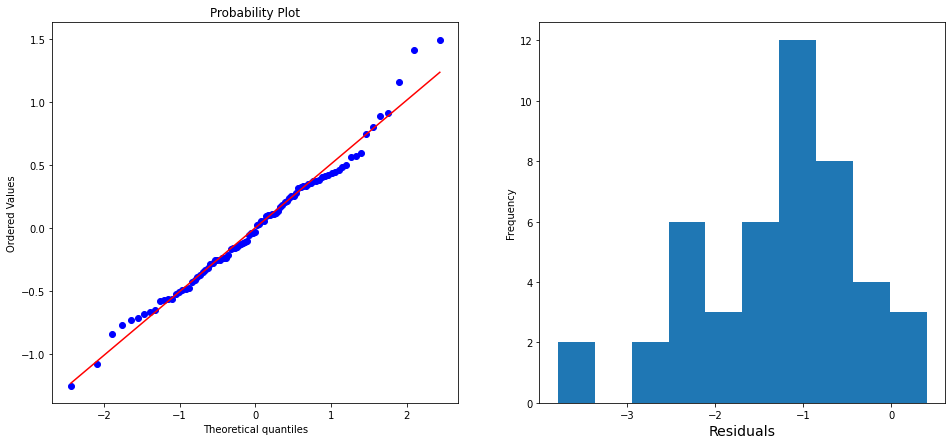

In [15]:
plt.rcParams["figure.figsize"] = (16,7)
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


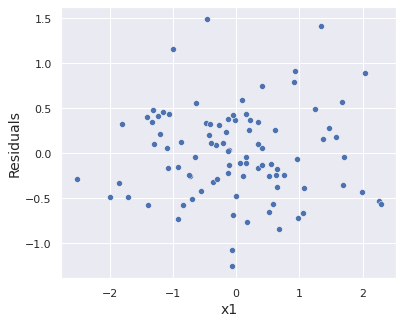

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


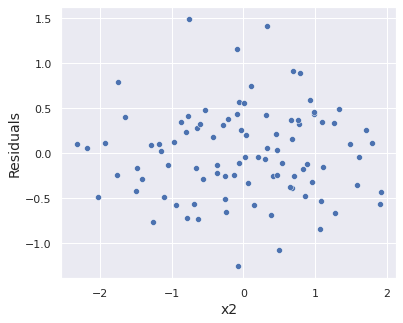

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


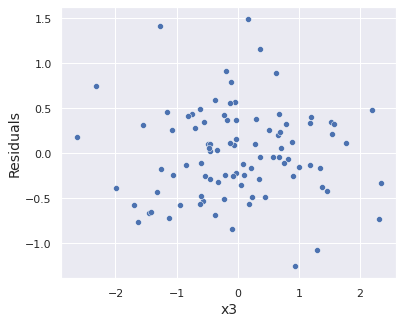

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


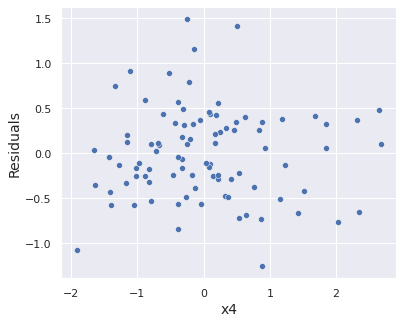

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


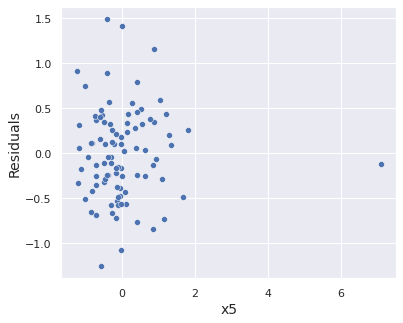

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


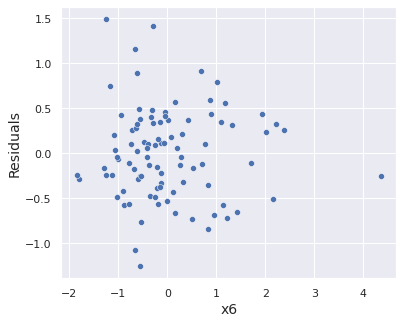

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


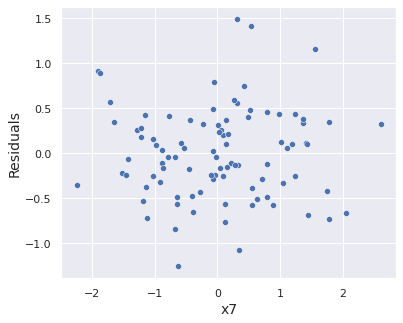

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


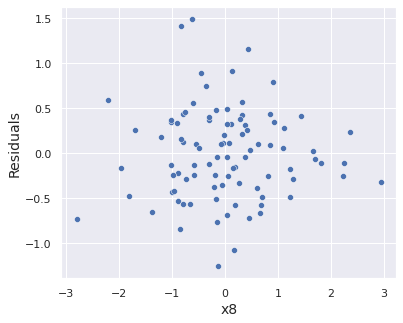

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


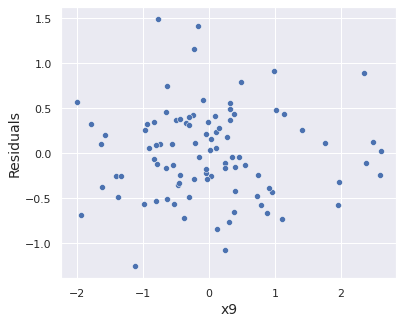

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


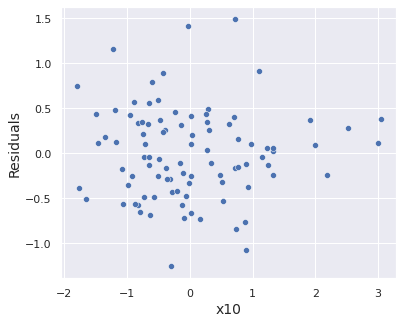

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


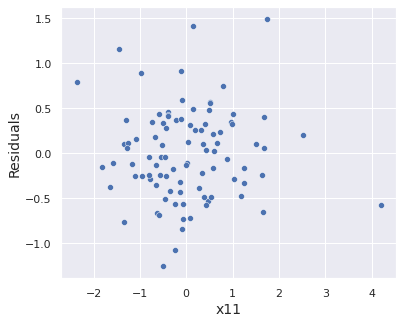

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


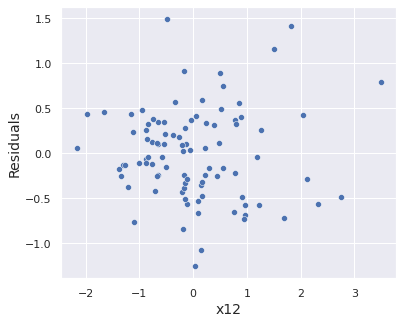

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


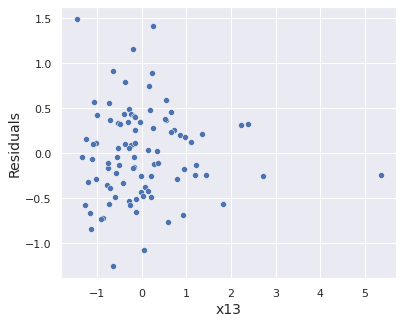

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


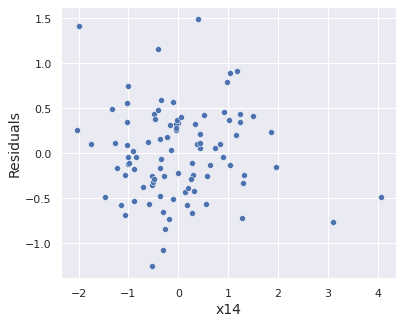

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


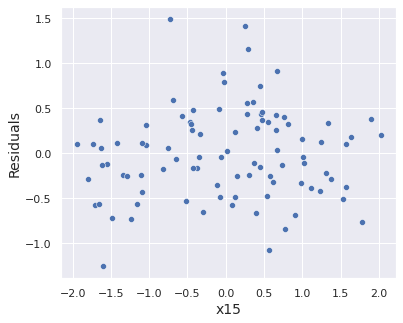

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


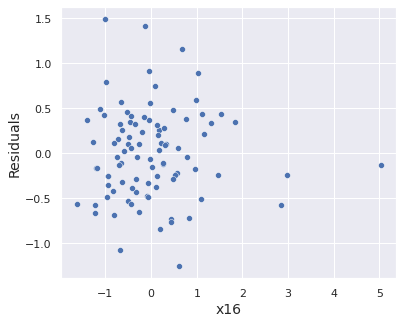

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


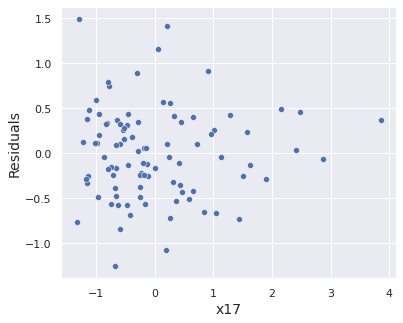

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


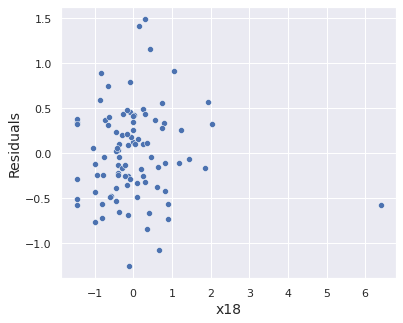

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


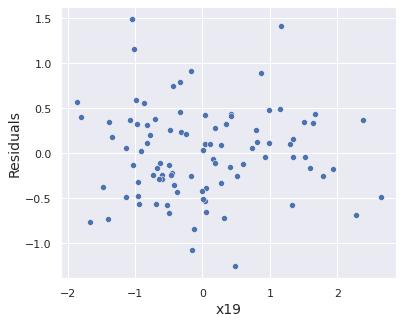

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


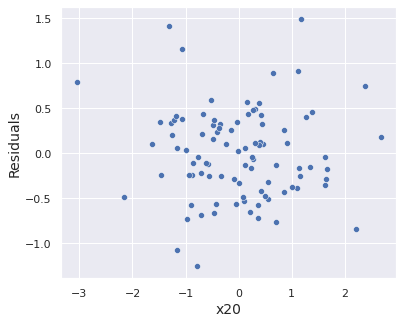

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


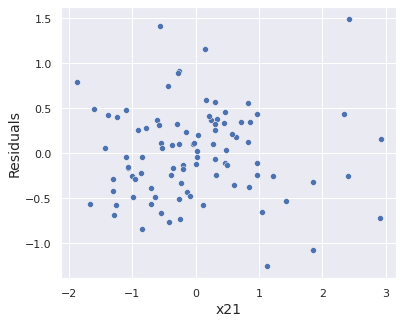

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


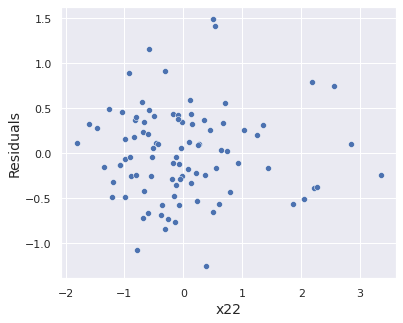

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


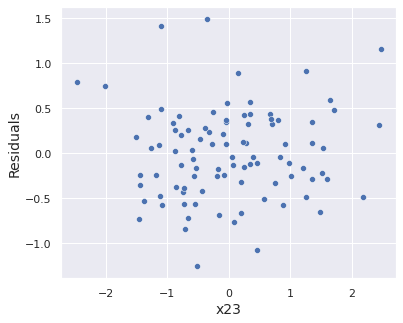

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


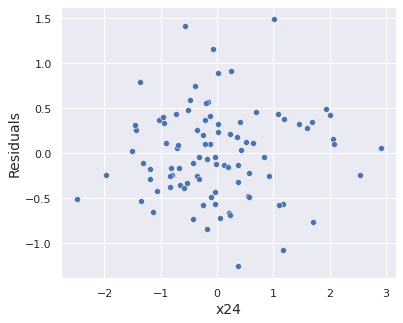

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


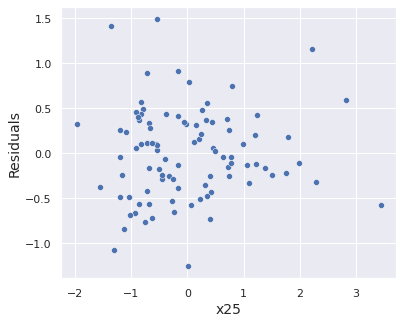

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


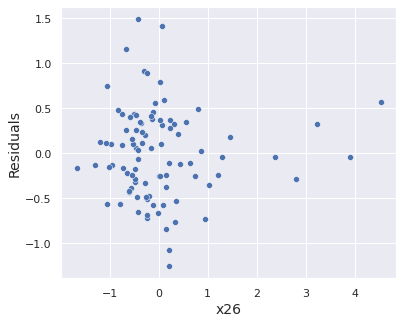

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


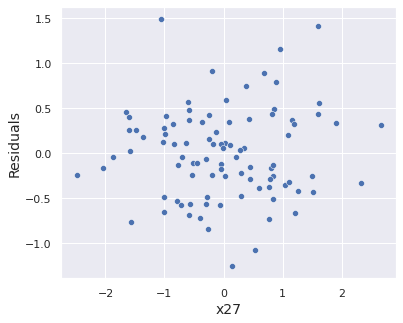

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


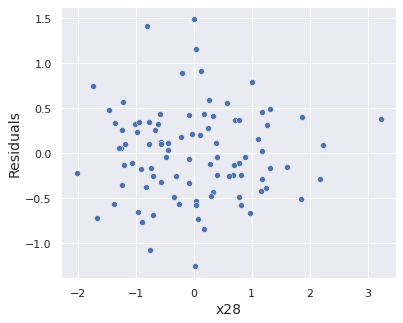

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


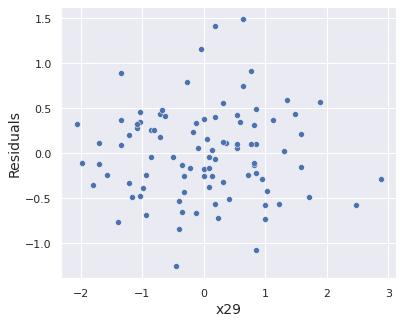

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


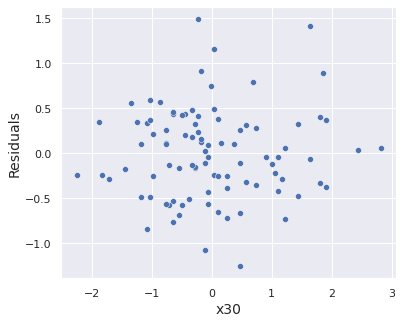

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


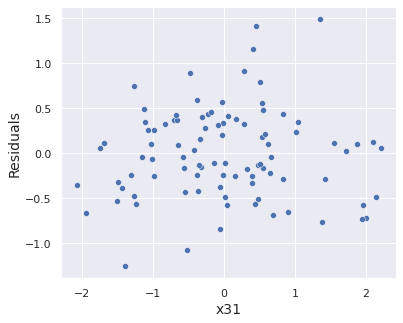

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


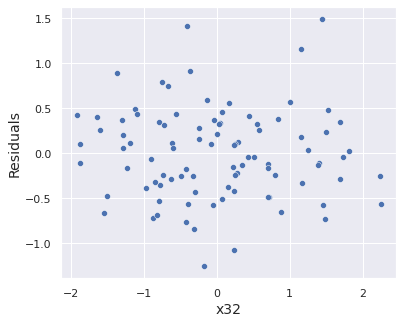

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


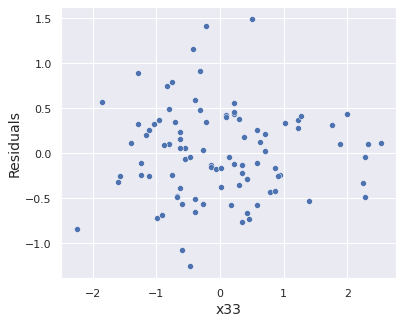

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


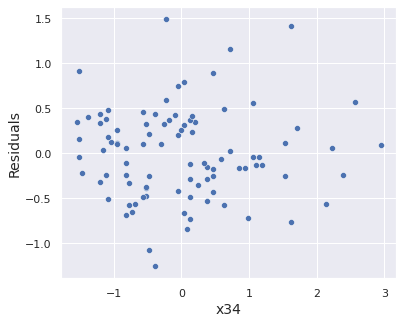

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


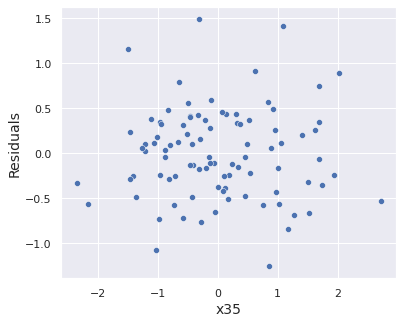

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


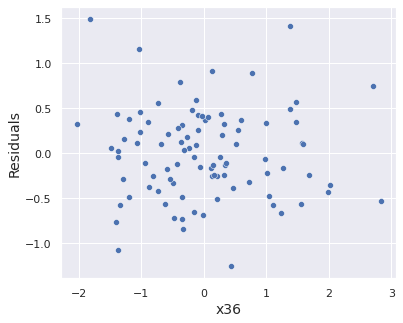

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


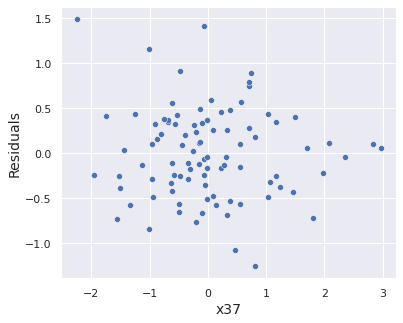

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


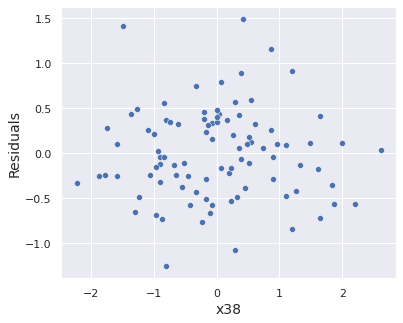

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


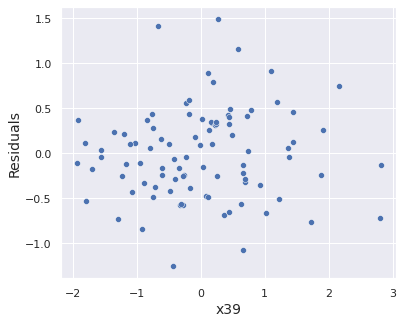

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


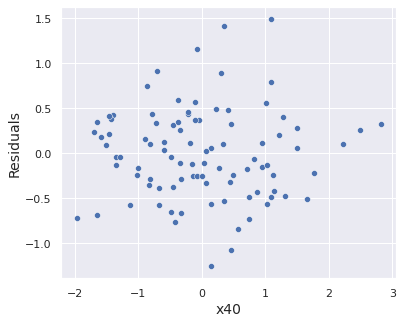

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


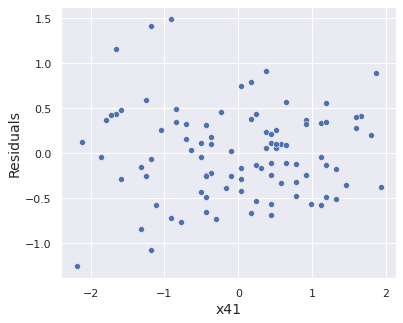

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


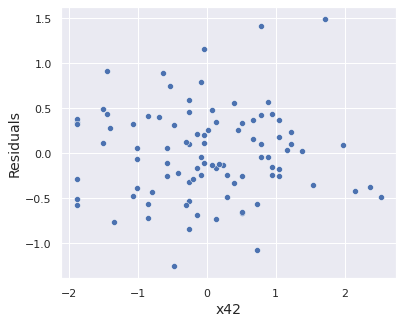

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


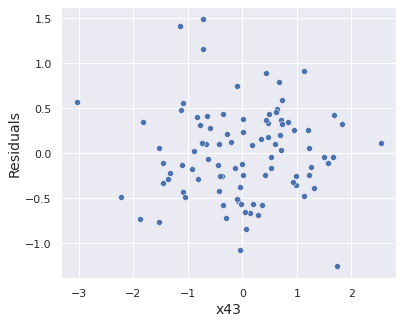

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


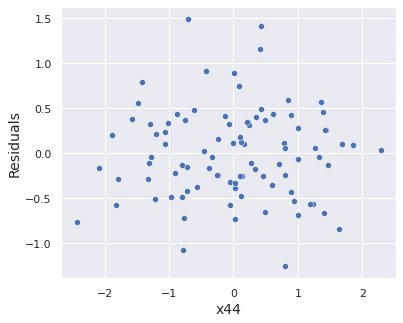

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


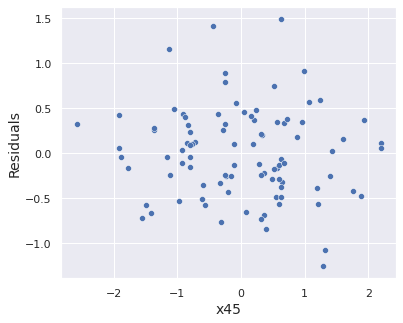

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


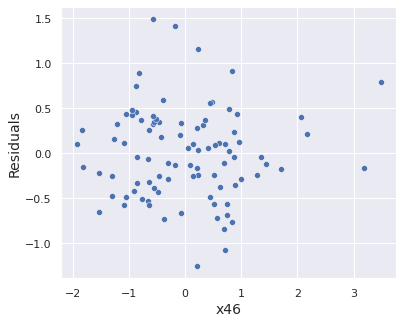

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


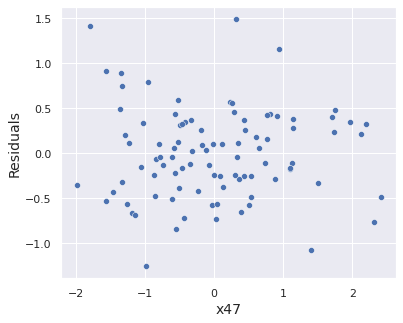

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


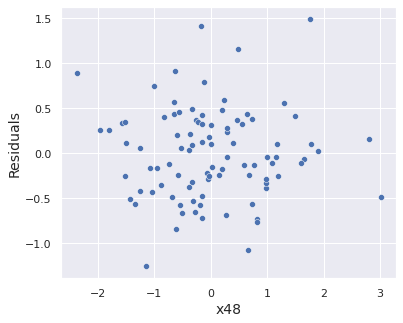

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


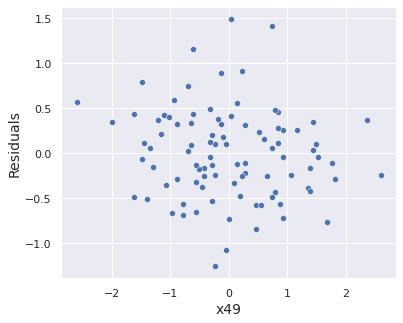

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


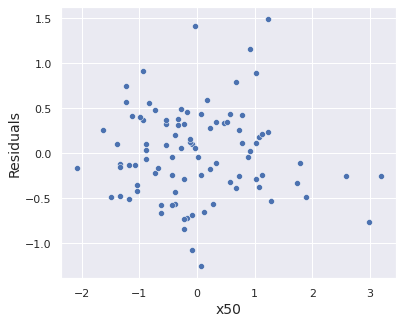

In [16]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6,5)})

for col in X:
    sns.scatterplot(X[col],fitted.resid)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Residuals', fontsize=14)
    plt.show()

### On screens above we can see couple of outliers, let's see them

In [17]:
X['x5'].idxmax()

41

In [18]:
X['x6'].idxmax()

48

In [19]:
X['x11'].idxmax()

77

In [20]:
X['x13'].idxmax()

86

In [21]:
X['x16'].idxmax()

29

In [22]:
X['x18'].idxmax()

77

### Let's do another analysis:
### Let's build a graph of the so-called "influence" points. Since the regression tends to reconfigure for atypical observations (lying far from the main cloud). Let's see if there are such points in our data.
### The squares of the residuals for each of the observations are plotted along the horizontal axis, and the "influence" of the observation along the vertical axis. The larger the vertical value, the more this observation affects the regression equation

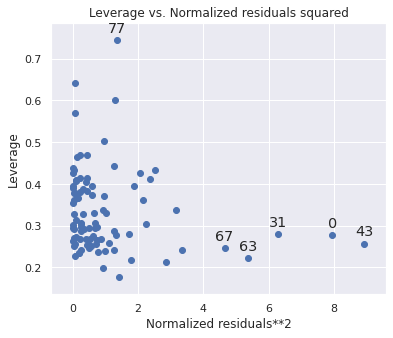

In [23]:
plot_leverage_resid2(fitted)
plt.show()

### Nothing prevents us from looking at some of the points (observations) that lie relatively far from the main cloud.

In [33]:
outliers = [41,48,77,86,29,0,43,31,63,67,35,16]
#scale.inverse_transform(X.loc[outliers])
#pd.DataFrame(scale.inverse_transform(X.loc[outliers]),columns = X.loc[outliers].columns)

In [53]:
X2 = X1.drop(X.index[outliers])
Y2 = Y.drop(Y.index[outliers])

In [26]:
model3 = sm.OLS(Y2,sm.add_constant(X2))
fitted = model3.fit()
print (fitted.summary())

                              OLS Regression Results                              
Dep. Variable:     LIFETIME_BEDVALUE_mean   R-squared:                       0.858
Model:                                OLS   Adj. R-squared:                  0.772
Method:                     Least Squares   F-statistic:                     10.04
Date:                    Mon, 02 May 2022   Prob (F-statistic):           1.32e-12
Time:                            11:53:10   Log-Likelihood:                -26.450
No. Observations:                      81   AIC:                             114.9
Df Residuals:                          50   BIC:                             189.1
Df Model:                              30                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


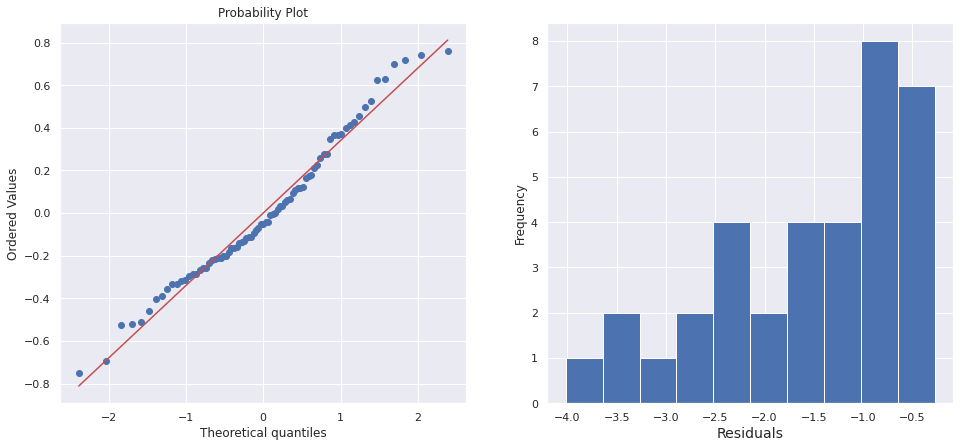

In [27]:
plt.rcParams["figure.figsize"] = (16,7)
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.show()

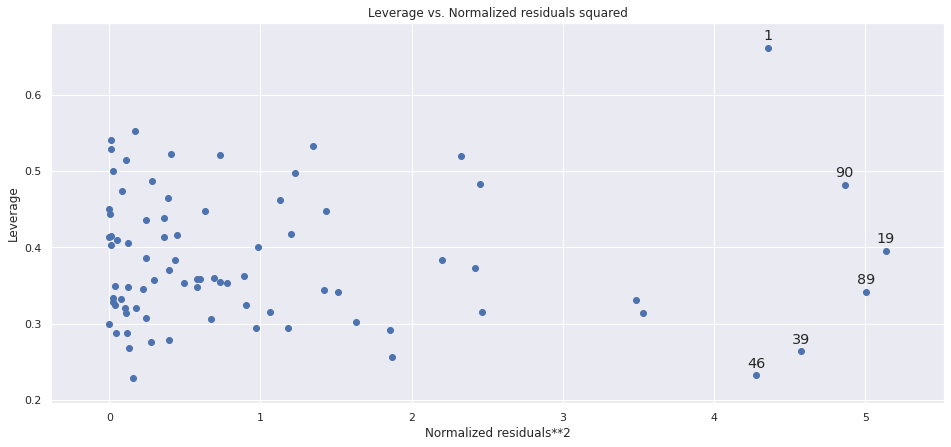

In [28]:
plot_leverage_resid2(fitted)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


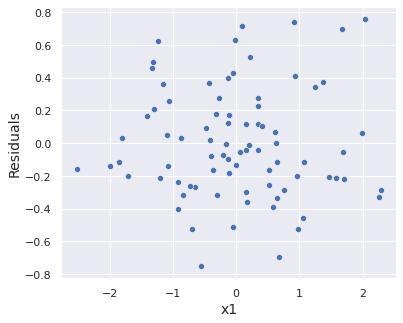

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


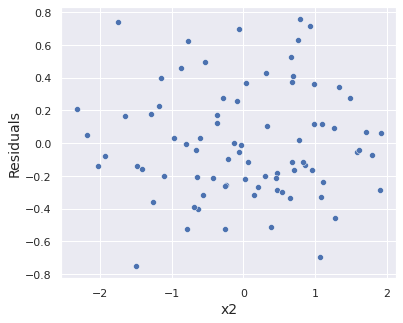

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


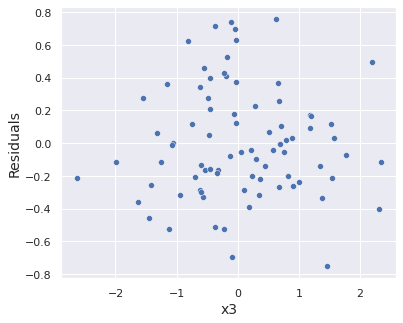

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


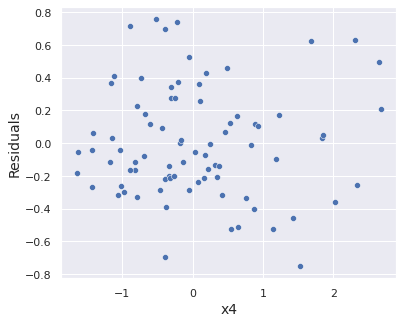

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


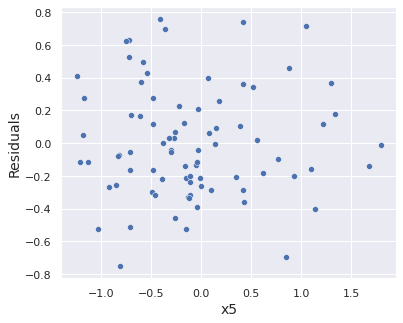

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


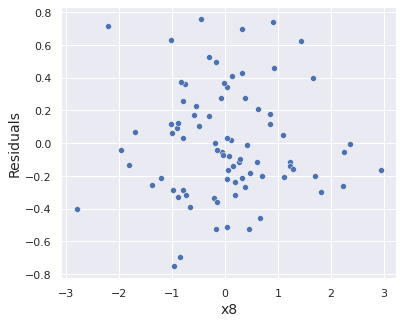

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


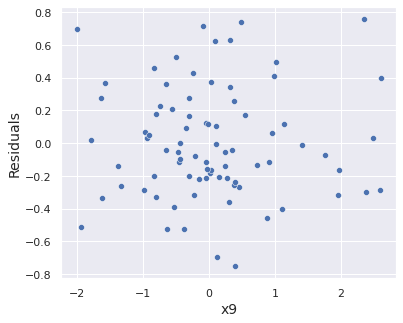

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


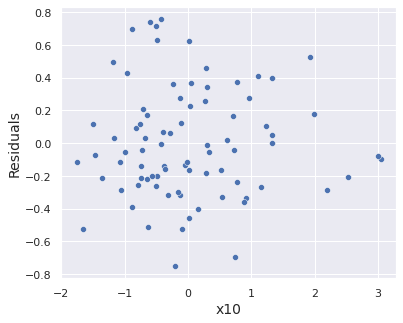

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


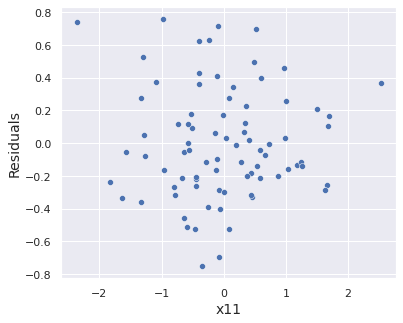

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


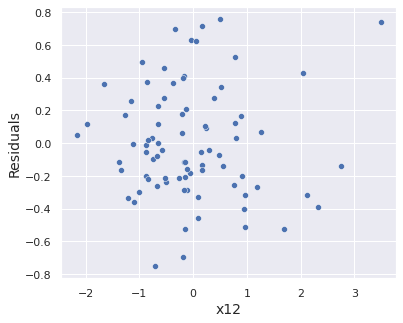

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


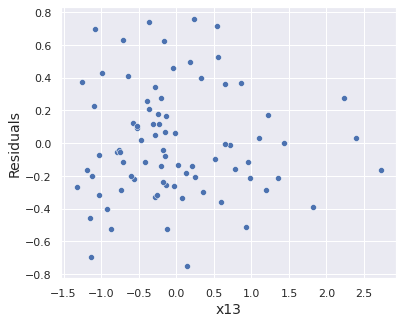

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


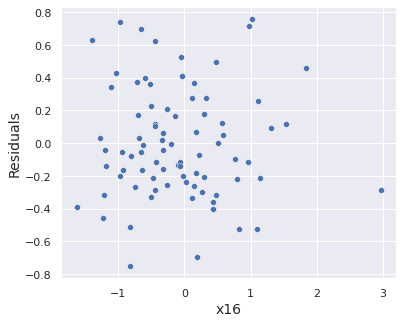

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


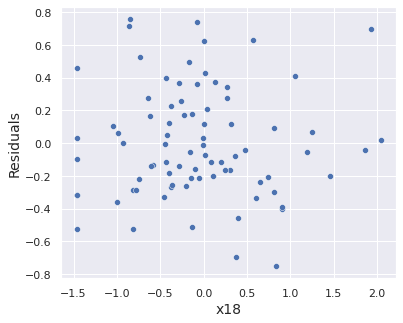

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


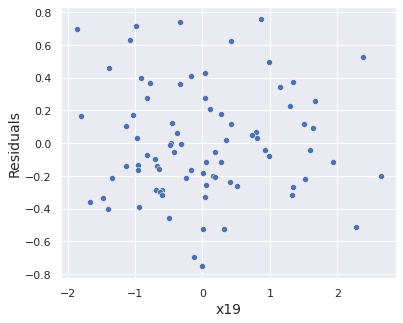

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


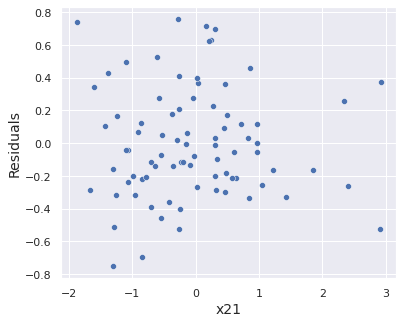

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


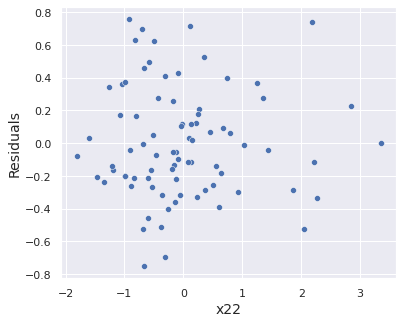

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


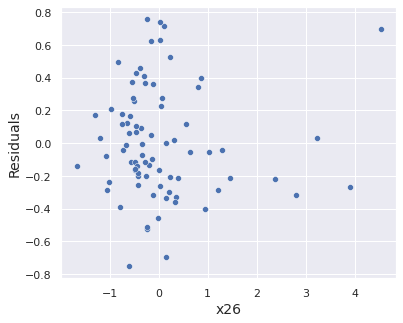

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


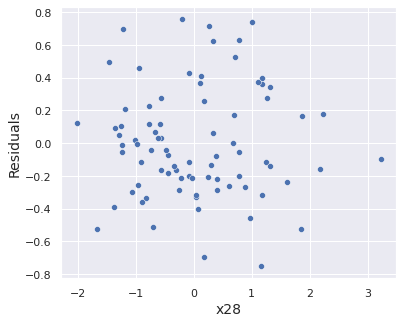

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


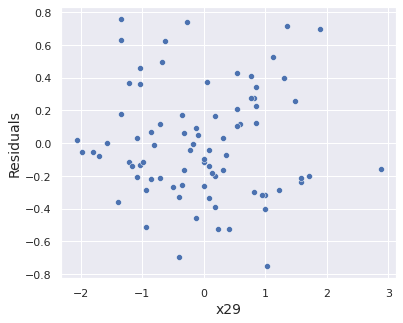

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


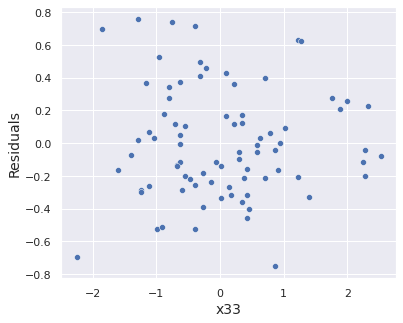

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


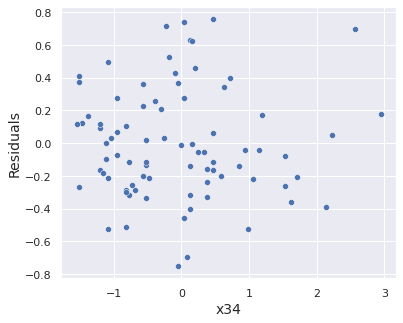

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


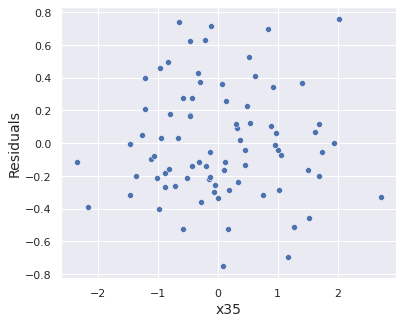

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


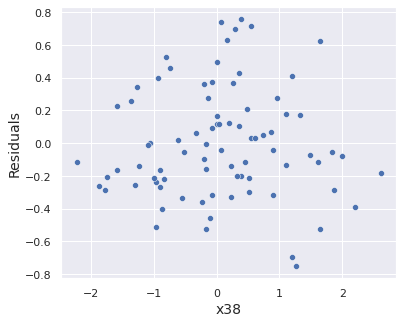

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


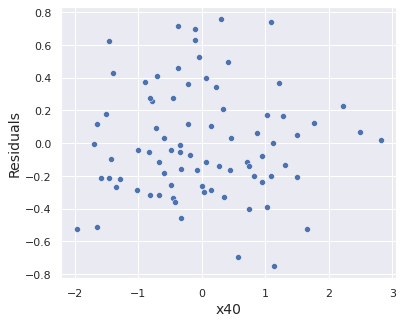

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


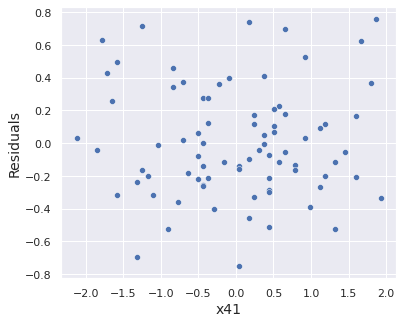

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


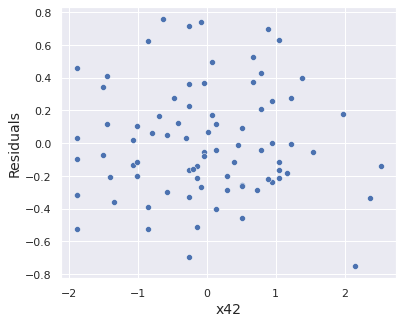

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


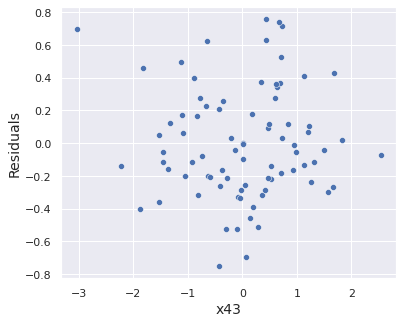

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


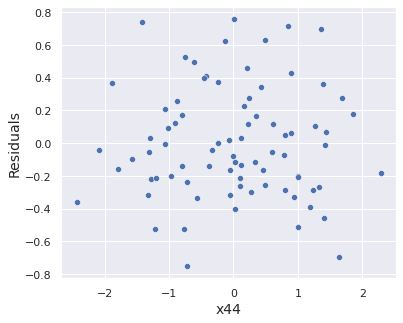

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


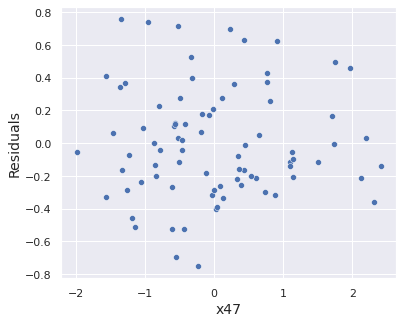

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


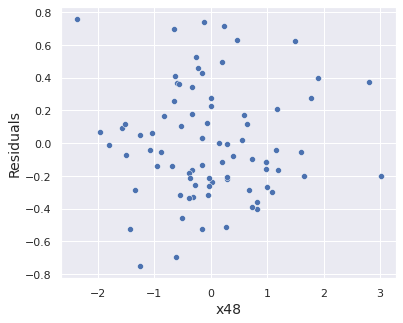

In [29]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6,5)})

for col in X2:
    sns.scatterplot(X2[col],fitted.resid)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Residuals', fontsize=14)
    plt.show()

### Also note that in the previous model we have insignificant variables: Intercept and others, we will remove them from the model.
## Model #4: Model without part of the observations (atypical) and without non-significant variables

In [90]:
X3= X2.drop(['x2','x3','x4','x8','x9','x10','x11','x12','x13','x16','x18','x21','x22','x33','x34','x40','x42','x44','x48'],axis=1)
Y3 = Y2

In [ ]:
model4 = sm.OLS(Y3,X3)
fitted = model4.fit()
print (fitted.summary())

In [78]:
print ('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.793016


/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


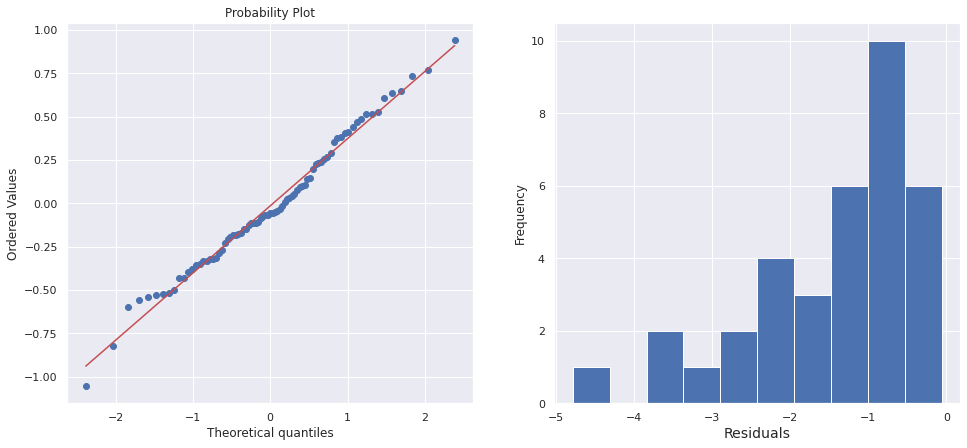

In [77]:
plt.rcParams["figure.figsize"] = (16,7)
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


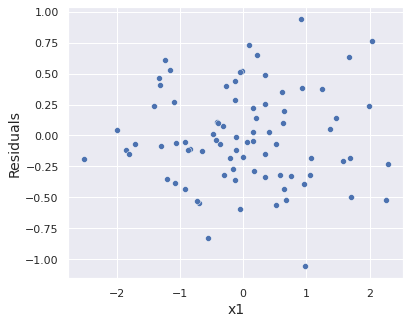

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


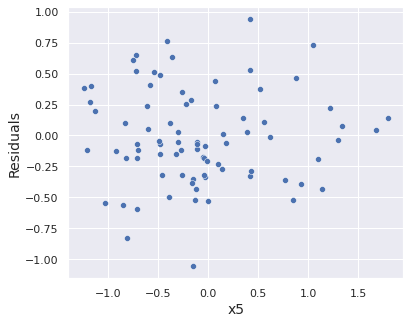

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


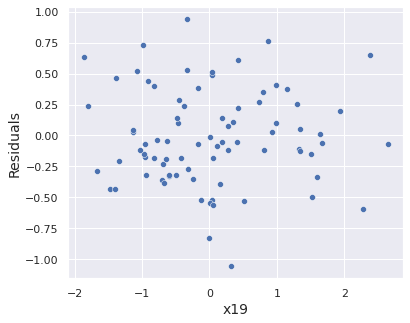

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


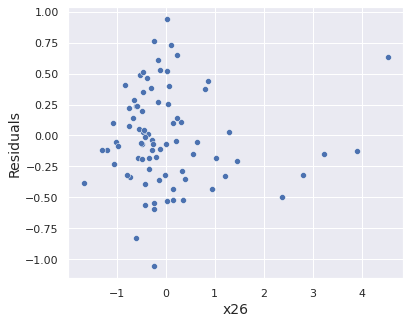

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


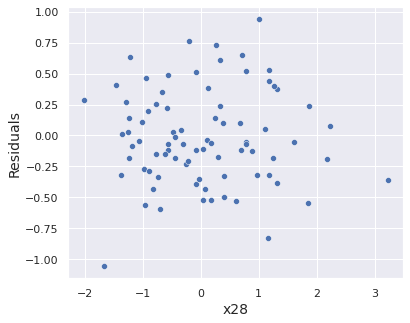

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


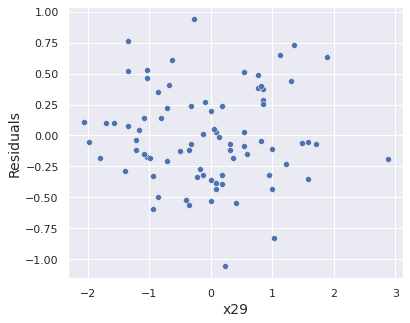

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


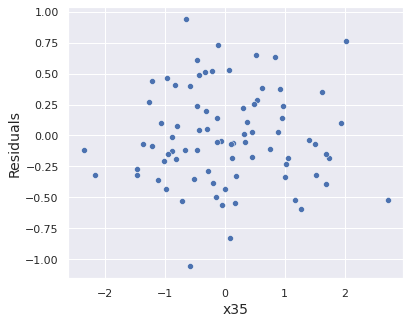

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


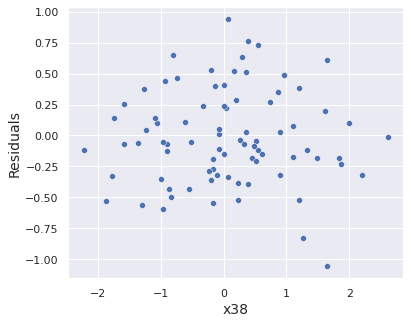

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


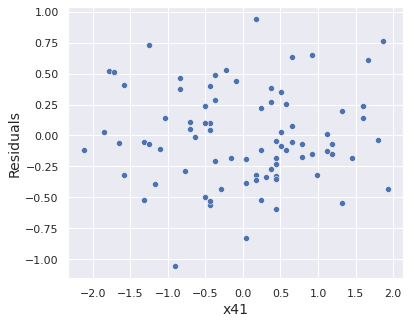

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


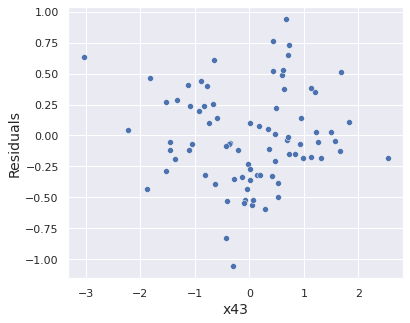

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


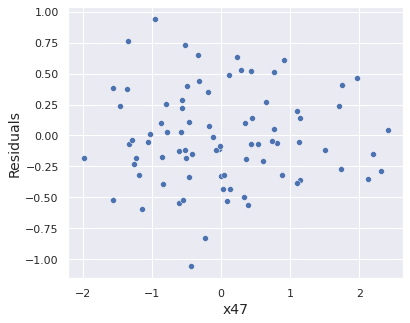

In [80]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6,5)})

for col in X3:
    sns.scatterplot(X3[col],fitted.resid)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Residuals', fontsize=14)
    plt.show()

In [120]:
coefs_list=pd.DataFrame(fitted.params)

In [ ]:
cols_dict_1 = {}
test = cols_dict
for key, value in test.items():
    try_1 = value
    try_1=try_1.replace('ACQ_BEDVALUE', 'Monetary percent (avg)')
    try_1=try_1.replace('CUSTOMER_ID', 'Customer Volume percent')
    cols_dict.update({key:try_1})

In [ ]:
for key, value in cols_dict.items():
    for i in coefs_list.index:   
        if coefs_list.loc[i].name==key:
            coefs_list = coefs_list.rename(index = {key : value})
        else: 
            pass

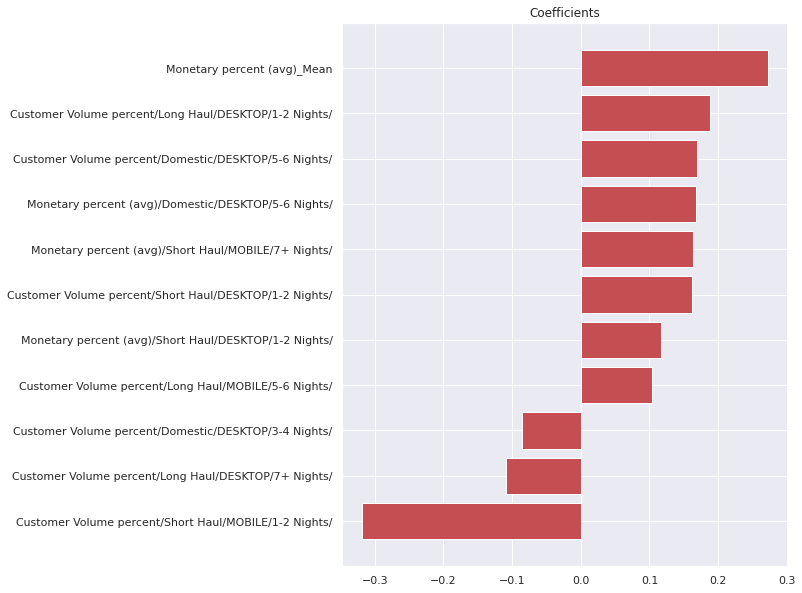

In [125]:
#features.index
features = coefs_list
coef = coefs_list.iloc[:,0]

features = features[coef != 0.0]
coef = coef[coef != 0]
coef_idx = np.argsort(coef)

plt.figure(figsize=(8, 10))
plt.title("Coefficients")
coef_num = range(len(coef))
plt.barh(coef_num, coef[coef_idx], color="r", align="center")

plt.yticks(coef_num, features.index[coef_idx])
plt.ylim([-1, len(features)])

plt.show()

## Takeaways: 
### 1) We now account for almost 79% of the variation in the target variable. This is a good result.
### 2) The accuracy criterion was chosen R^2. From it, "Important" variables for the model depicted above are "Not important" - the rest
### 3) Consider further exploration of atypical observations, removed prior model #3   
### 4) Consider increasing the number of observations, in the final model we have around 80 rows of data and 11 columns. While there are no strict rules on data volumes, a rule of thumb of having 10 rows of data per 1 column